In [85]:
# Import Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [87]:
data=pd.read_csv('titanic_dataset.csv')

In [88]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
# Dataset is about Airline Passengers.It has 12 columns and 891 rows.It has missing values in Age,Cabin
# and Embarked columns

drop the column passenger ID as it has no relevance

In [90]:
data=data.drop('PassengerId',axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


basic details of the dataset

In [91]:
data.shape

(891, 11)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [93]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [94]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<font color='red'><font size=3>Dataset is about Airline Passengers.
  - It has 11 columns and 891 rows.
  - It has missing values in Age,Cabin and Embarked columns
  - Name columns is having distinct values

# Handling missing values

In [95]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [96]:
# dataset is having missing values in Age,Cabin and Embarked
#Cabin  and Embarked are  object class and Age is float
# we need to check the distribution of Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

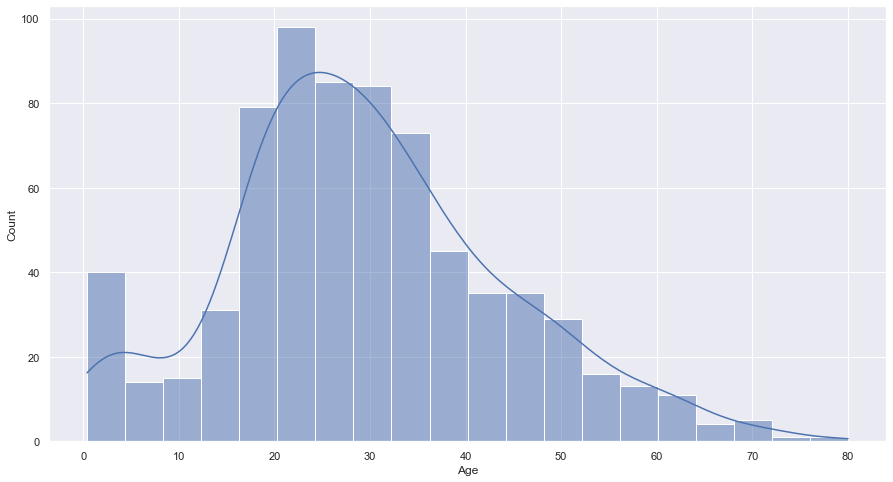

In [97]:
sns.histplot(data=data['Age'],kde=True)

In [98]:
# its a right skewed distributution so we will use median to replace missing value

In [99]:
data1=data
data1['Age']=data1['Age'].fillna(data1['Age'].median())

In [100]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

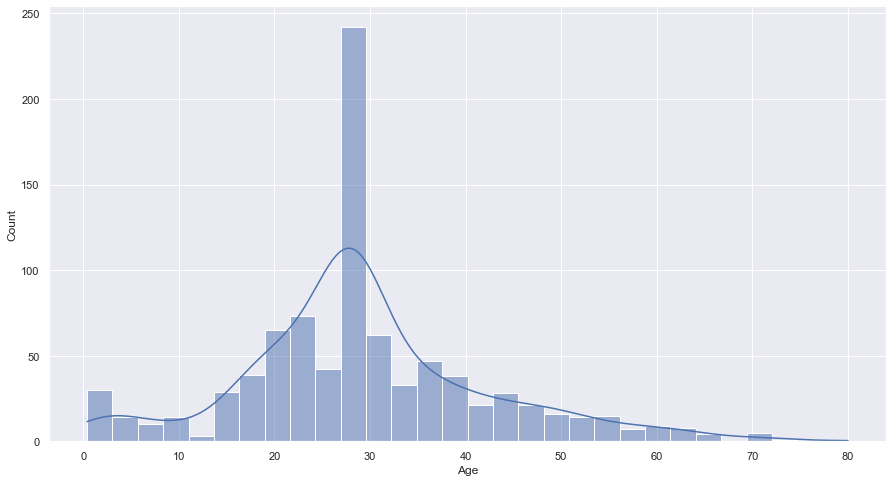

In [101]:
sns.histplot(data=data1['Age'],kde=True)

In [102]:
# The misisng values in Age column has been filled

In [103]:
# 2 Missing Values in Embarked column

In [104]:
data1[data1['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

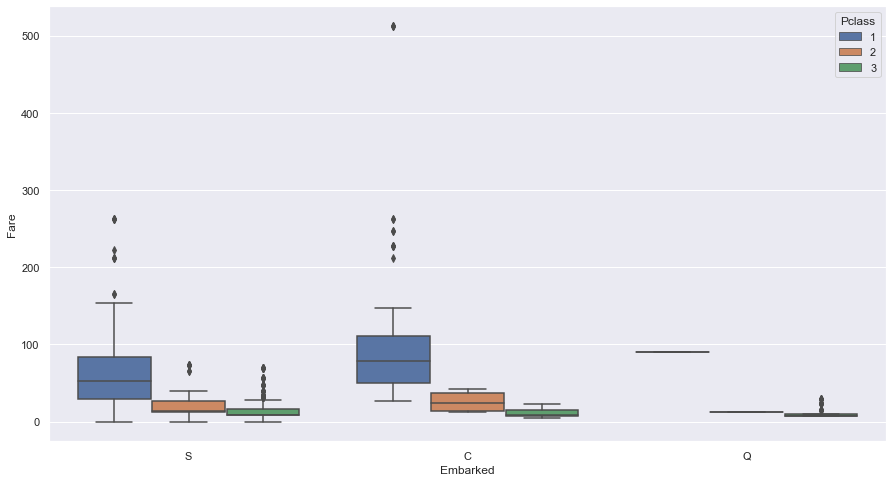

In [105]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=data1,x='Embarked',y='Fare',hue='Pclass')

In [106]:
#Both passengers belong to pclass 1 and same fare of 80. As per box plot median  of  Embarked C is closest to 80.
# So we will fill with value C for these missing values

In [107]:
data1['Embarked']=data1['Embarked'].fillna(value='C')

In [108]:
data1[data1['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [109]:
# Missing values in Embarked has been replaced

In [110]:
#handling missing values in Cabin column

In [111]:
data1['Cabin'].count()

204

In [112]:
data1['Cabin'].isna().sum()

687

In [113]:
data1['Cabin'].nunique()

147

In [114]:
# out of 891 rows in Cabin 687 records are missing. Also in remaining 204 rows 147 records are unique
# Since more than 77% of data in column are missing filling these values with median/mode/mean willnot help

In [115]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [116]:
# All other columns missing values are handled and if not necessary for study Cabin can be dropped

# 5. Check and handle outliers in at least 3 columns in the dataset

<AxesSubplot:>

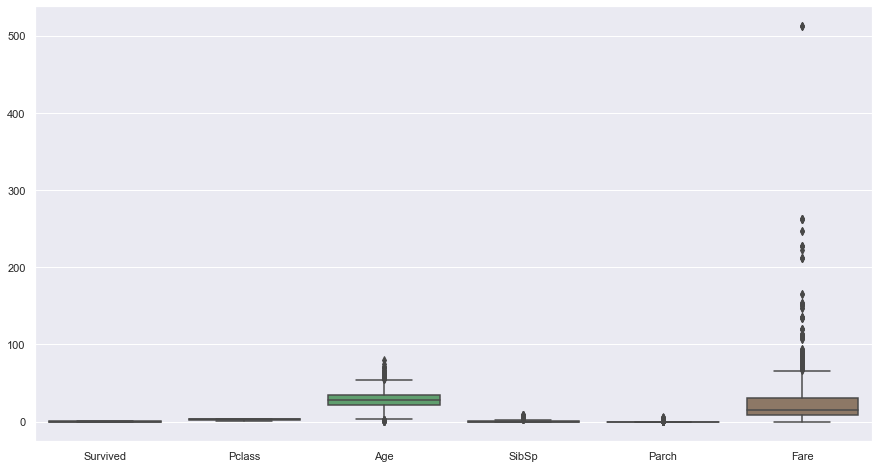

In [117]:
sns.boxplot(data=data1)

In [118]:
#As per the boxplot Age,SibSp,Parch and Fare has outliers

In [119]:
# handling outlier in Age column
# finding upper limit ,lower limit and IQR

In [120]:
Q1=np.percentile(data1['Age'],25)
Q3=np.percentile(data1['Age'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 22.0
Quartile 3: 35.0
Inter Quartile Range(IQR): 13.0
Lower Limit: 2.5
Upper Limit: 54.5


In [121]:
# Outlier Data

In [122]:
data1[(data1['Age']<LL) | (data1['Age']>UL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
16,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
33,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,C
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


In [123]:
# Age less than lower limit fitted to lower limit
data1[(data1['Age']<LL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
164,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
205,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
297,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [124]:
index=data1.loc[(data1['Age']<LL)].index
index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [125]:
data1.loc[index,'Age']=LL

In [126]:
data1[(data1['Age']<LL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [127]:
# Age greater than upper limit fitted to upper limit
data1[(data1['Age']>UL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
152,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
170,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
174,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


In [128]:
index=data1.loc[(data1['Age']>UL)].index
index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [129]:
data1.loc[index,'Age']=UL

In [130]:
data1[(data1['Age']>UL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [131]:
#All lower limit and upper limit values have beed adjusted for Age column. Checking boxplot again

<AxesSubplot:>

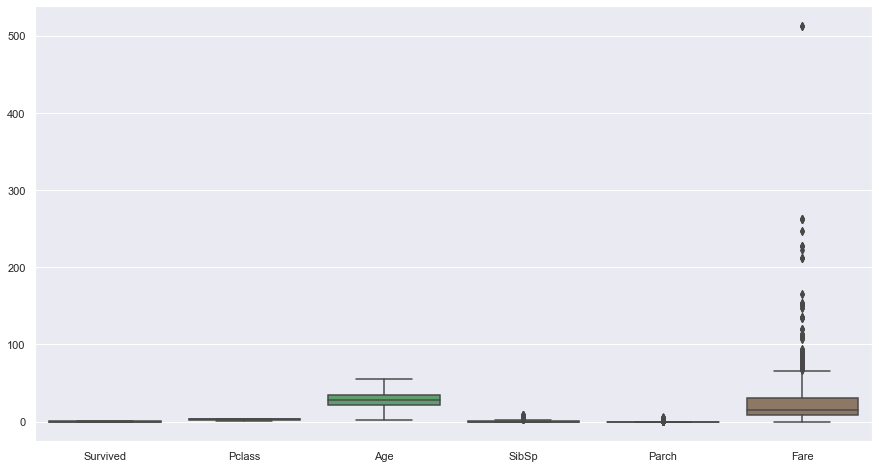

In [132]:
sns.boxplot(data=data1)

In [133]:
# Age outlier is corrected

In [134]:
# Handling Fare outlier
# finding upper limit ,lower limit and IQR

In [135]:
Q1=np.percentile(data1['Fare'],25)
Q3=np.percentile(data1['Fare'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 7.9104
Quartile 3: 31.0
Inter Quartile Range(IQR): 23.0896
Lower Limit: -26.724
Upper Limit: 65.6344


In [136]:
# Outlier Data

In [137]:
data1[(data1['Fare']<LL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [138]:
data1[(data1['Fare']>UL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S


In [139]:
# Adjusting the values above upper limit to upper limit

In [140]:
index=data1.loc[(data1['Fare']>UL)].index
index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [141]:
data1.loc[index,'Fare']=UL

In [142]:
#All lower limit and upper limit values have beed adjusted for Fare column. Checking boxplot again

<AxesSubplot:>

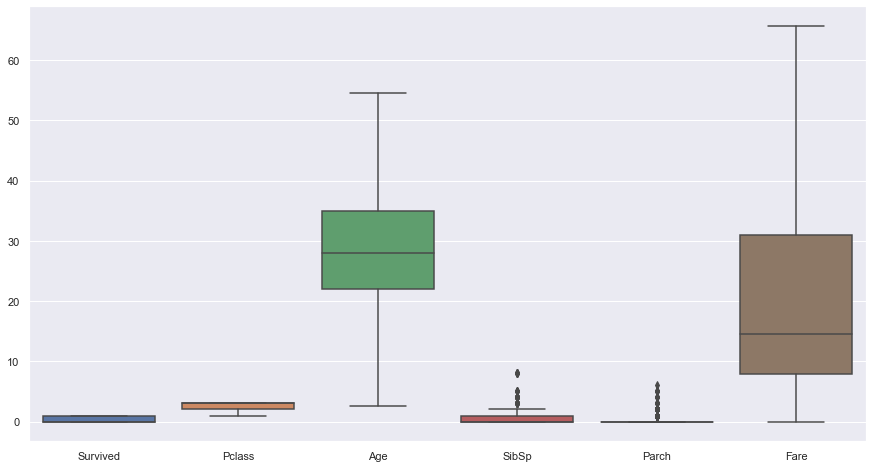

In [143]:
sns.boxplot(data=data1)

In [144]:
# Fare outlier is corrected

In [145]:
# Handling SibSp outlier
# finding upper limit ,lower limit and IQR

In [146]:
Q1=np.percentile(data1['SibSp'],25)
Q3=np.percentile(data1['SibSp'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 0.0
Quartile 3: 1.0
Inter Quartile Range(IQR): 1.0
Lower Limit: -1.5
Upper Limit: 2.5


In [147]:
# Outlier Data
data1[(data1['SibSp']<LL) | (data1['SibSp']>UL)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,0,3,"Palsson, Master. Gosta Leonard",male,2.5,3,1,349909,21.0750,NaN,S
16,0,3,"Rice, Master. Eugene",male,2.5,4,1,382652,29.1250,NaN,Q
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,65.6344,C23 C25 C27,S
50,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
85,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S


In [148]:
# Adjusting the values above upper limit to upper limit

In [149]:
index=data1.loc[(data1['SibSp']>UL)].index
index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [150]:
data1.loc[index,'SibSp']=UL

In [151]:
#All lower limit and upper limit values have beed adjusted for Fare column. Checking boxplot again

<AxesSubplot:>

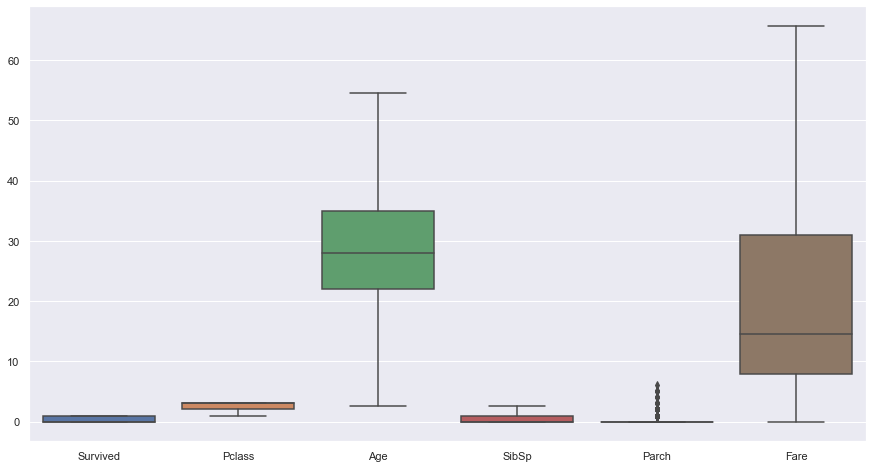

In [152]:
sns.boxplot(data=data1)

In [153]:
#Outliers in SibSP is corrected

In [154]:
# Handling Parch outlier
# finding upper limit ,lower limit and IQR

In [155]:
Q1=np.percentile(data1['Parch'],25)
Q3=np.percentile(data1['Parch'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 0.0
Quartile 3: 0.0
Inter Quartile Range(IQR): 0.0
Lower Limit: 0.0
Upper Limit: 0.0


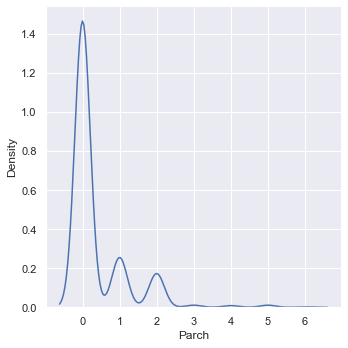

In [156]:
sns.displot(data1['Parch'],kind='kde')

In [157]:
# Almost all values of this columns is 0. So outliers cannot be corrected using IQR method.

doing min max scaling on the feature set

In [158]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
x = data.drop(['Age','Survived','Name','Ticket'],axis=1)
y = data['Survived']
#dummy encoding
x=pd.get_dummies(x)
#fiting scale
x = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x)
x.describe()


,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.170595,0.063599,0.366375,0.352413,0.647587,0.001122,0.001122,0.001122,0.001122,...,0.002245,0.003367,0.003367,0.001122,0.002245,0.004489,0.001122,0.190797,0.086420,0.722783
std,0.418036,0.283298,0.134343,0.312056,0.477990,0.477990,0.033501,0.033501,0.033501,0.033501,...,0.047351,0.057961,0.057961,0.033501,0.047351,0.066890,0.033501,0.393150,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.120522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.220223,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.400000,0.000000,0.472313,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32,test_size=0.2)

In [160]:
#doing GaussianNB
#Naïve Bayes’ Classifier

from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
classifer.fit(x_train,y_train)
y_pred = classifer.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('accuracy score',accuracy_score(y_test,y_pred))


Confusion Matrix
 [[105   3]
 [ 60  11]]
Classification Report
               precision    recall  f1-score   support

           0       0.64      0.97      0.77       108
           1       0.79      0.15      0.26        71

    accuracy                           0.65       179
   macro avg       0.71      0.56      0.51       179
weighted avg       0.70      0.65      0.57       179

accuracy score 0.6480446927374302


In [161]:
#Naïve Bayes’ Classifier (Bernoulli)

from sklearn.naive_bayes import BernoulliNB
cla = BernoulliNB()
cla.fit(x_train,y_train)
y_pred = cla.predict(x_test)
cs = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('accuracy score',accuracy_score(y_test,y_pred))


Confusion Matrix
 [[93 15]
 [20 51]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       108
           1       0.77      0.72      0.74        71

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

accuracy score 0.8044692737430168


# Hyper parameter tuning

In [162]:
classifer.get_params()


{'priors': None, 'var_smoothing': 1e-09}

In [163]:
from sklearn.model_selection import RepeatedStratifiedKFold
method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=32)


In [174]:
params= {'var_smoothing': np.logspace(0,-9, num=100)}

NB_grid = GridSearchCV(estimator=classifer, 
                 param_grid=params, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy') 
from sklearn.model_selection import GridSearchCV
NB_grid.fit(x_train, y_train)
NB_grid.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


{'var_smoothing': 0.8111308307896871}

In [175]:
NB_grid.best_score_


0.7962636932707354

In [173]:
# Bernoulli NB was giving a higher accuracy of 80% so folding using classifier the model couldnt give a better score